# EDA Goes Here

Shape: (151, 13)
Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Dtypes:
 Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area        object
Loan_Status          object
dtype: object

First 5 rows:
 

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583               1508         128               360   
1             3000                  0          66               360   
2             2583               2358         120               360   
3             6000                  0         141               360   
4             5417               4196         267               360   

   Credit_History Property_Area Loan_Status  
0               1         Urban           Y  
1               1         Urban           Y  
2               1   

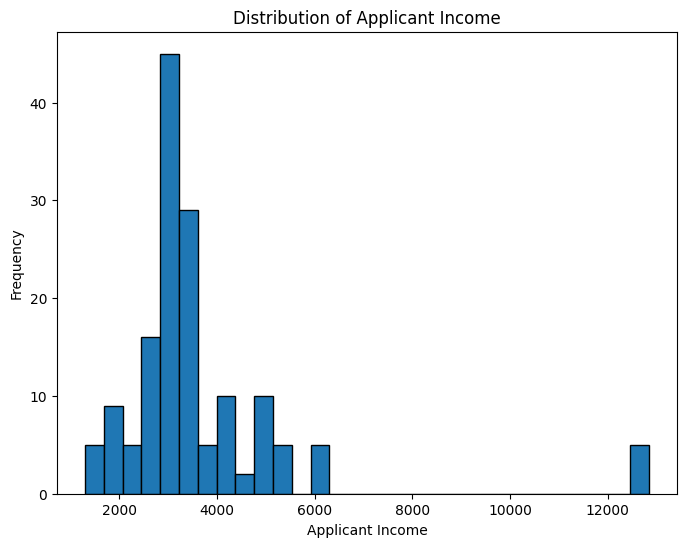


ApplicantIncome stats:
 count      151.000000
mean      3680.443709
std       1971.935035
min       1299.000000
25%       3036.000000
50%       3200.000000
75%       3833.000000
max      12841.000000
Name: ApplicantIncome, dtype: float64

Loan approval by Gender:
 Loan_Status         N         Y
Gender                         
Female       0.600000  0.400000
Male         0.439716  0.560284


<Figure size 600x500 with 0 Axes>

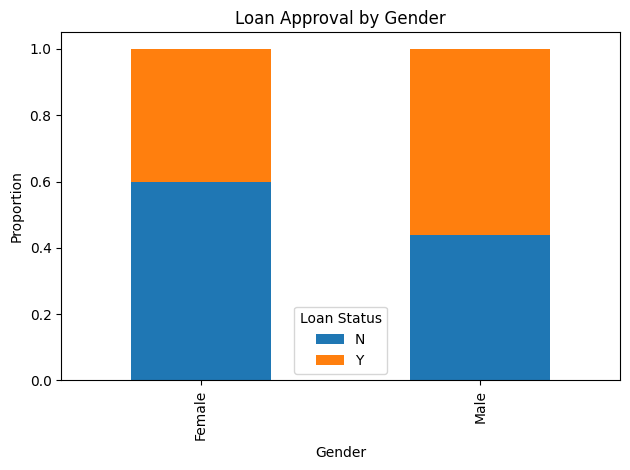


Numeric columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


<Figure size 1500x1000 with 0 Axes>

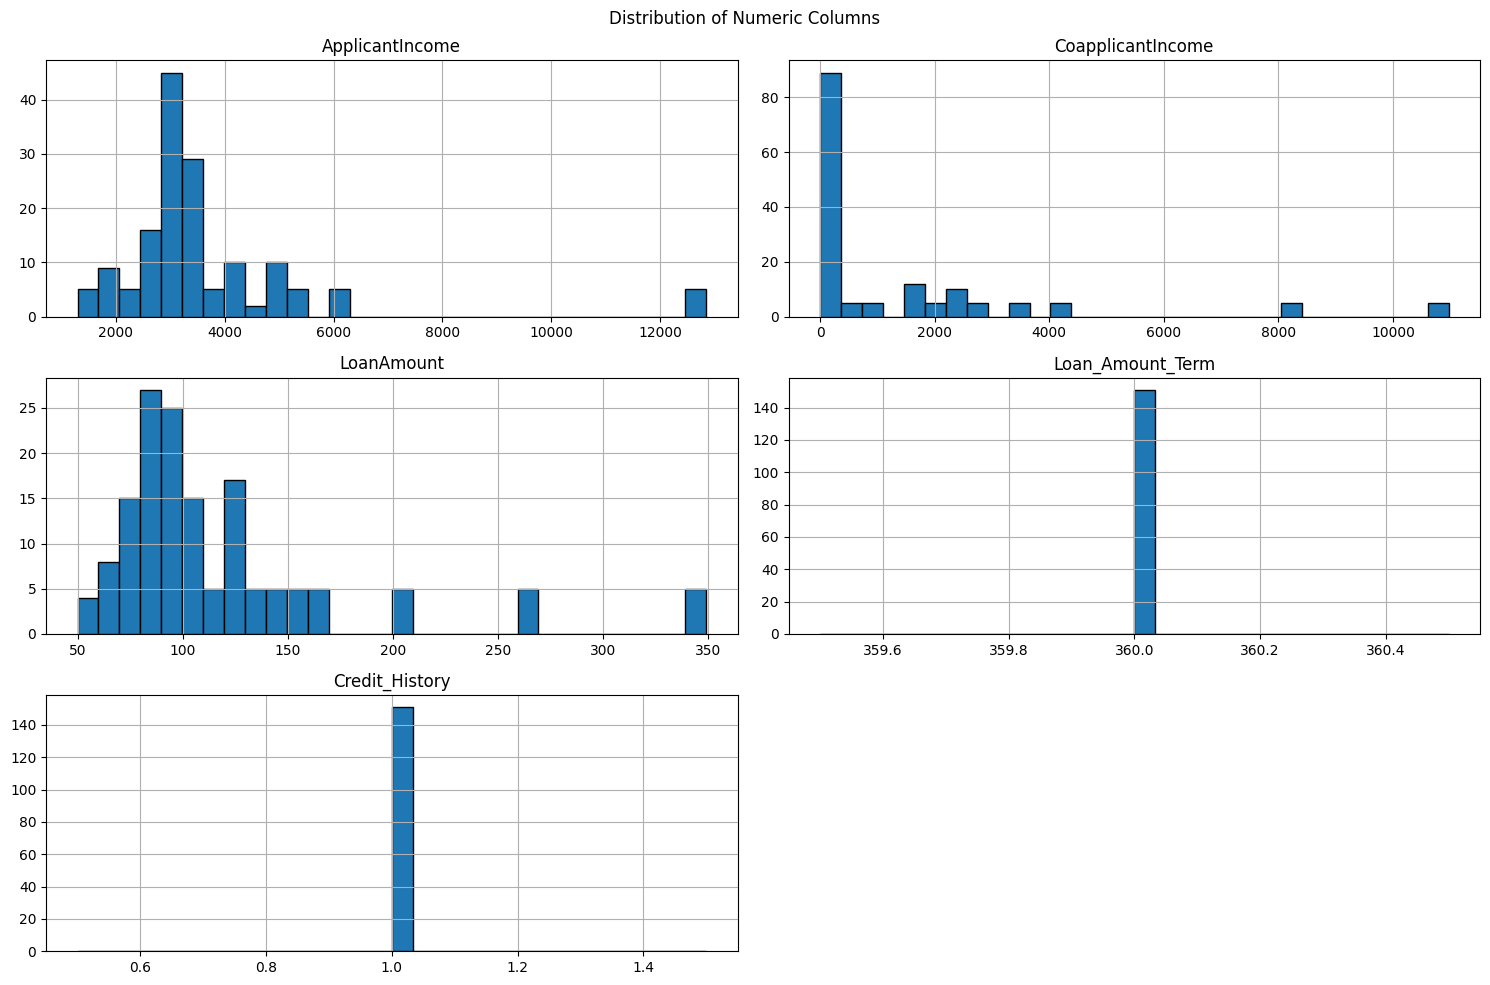


Approved mean: 3767.9638554216867 Rejected mean: 3573.6176470588234
T-statistic: 0.6013, p-value: 0.5486
No significant difference in income between approved and rejected applicants.

Categorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Nulls after imputation:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_904\2128696458.py:102: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_imputed[col].fillna(mode_vals[0], inplace=True)



LogisticRegression Results:
Accuracy: 0.6129032258064516
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.47      0.57        17
           1       0.55      0.79      0.65        14

    accuracy                           0.61        31
   macro avg       0.64      0.63      0.61        31
weighted avg       0.65      0.61      0.61        31


SVM Results:
Accuracy: 0.5806451612903226
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.41      0.52        17
           1       0.52      0.79      0.63        14

    accuracy                           0.58        31
   macro avg       0.61      0.60      0.57        31
weighted avg       0.62      0.58      0.57        31


Decision Tree Results:
Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00   

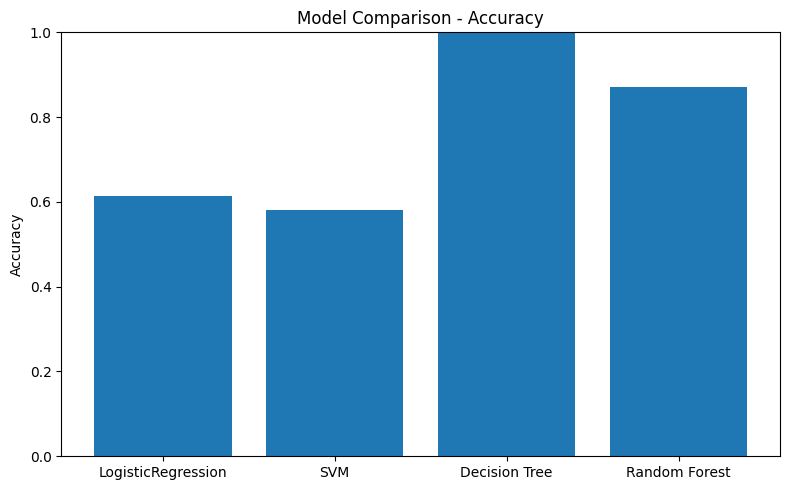

In [2]:
# Importing libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot  as plt

import seaborn as sbn

from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import  LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Consolidated EDA and Modeling pipeline (single cell)
# Assumes necessary libraries (pandas, numpy, matplotlib, seaborn, scipy, sklearn) are already imported in the notebook.

# 1. Load data
data = pd.read_csv('loan_data.csv')
print("Shape:", data.shape)
print("Columns:", list(data.columns))
print("\nDtypes:\n", data.dtypes)
print("\nFirst 5 rows:\n", data.head())

# 2. Missing values
print("\nMissing values per column:\n", data.isnull().sum())

# 3. ApplicantIncome distribution
if 'ApplicantIncome' in data.columns:
    plt.figure(figsize=(8,6))
    plt.hist(data['ApplicantIncome'].dropna(), bins=30, edgecolor='black')
    plt.title("Distribution of Applicant Income")
    plt.xlabel("Applicant Income")
    plt.ylabel("Frequency")
    plt.show()
    print("\nApplicantIncome stats:\n", data['ApplicantIncome'].describe())

# 4. Loan approval by Gender and plot
if 'Gender' in data.columns and 'Loan_Status' in data.columns:
    loan_by_gender = data.groupby('Gender')['Loan_Status'].value_counts(normalize=True).unstack(fill_value=0)
    print("\nLoan approval by Gender:\n", loan_by_gender)
    plt.figure(figsize=(6,5))
    loan_by_gender.plot(kind='bar', stacked=True)
    plt.title("Loan Approval by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Proportion")
    plt.legend(title='Loan Status')
    plt.tight_layout()
    plt.show()

# 5. Numeric columns and histograms
numeric_cols = data.select_dtypes(include=[np.number]).columns
print("\nNumeric columns:", list(numeric_cols))
if len(numeric_cols)>0:
    plt.figure(figsize=(15,10))
    data[numeric_cols].hist(bins=30, edgecolor='black', figsize=(15,10))
    plt.suptitle("Distribution of Numeric Columns")
    plt.tight_layout()
    plt.show()

# 6. Compare ApplicantIncome by Loan_Status and t-test
approved_income = pd.Series(dtype=float)
rejected_income = pd.Series(dtype=float)
if 'Loan_Status' in data.columns and 'ApplicantIncome' in data.columns:
    approved_income = data.loc[data['Loan_Status']=='Y', 'ApplicantIncome'].dropna()
    rejected_income = data.loc[data['Loan_Status']=='N', 'ApplicantIncome'].dropna()
    print("\nApproved mean:", approved_income.mean(), "Rejected mean:", rejected_income.mean())
    t_stat, p_value = stats.ttest_ind(approved_income, rejected_income, nan_policy='omit')
    print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Significant difference in income between approved and rejected applicants.")
    else:
        print("No significant difference in income between approved and rejected applicants.")

# 7. Prepare for imputation: separate numeric and categorical
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical columns:", list(categorical_cols))

# 8. Imputation (copy data)
data_imputed = data.copy()

# Impute categorical cols with mode
for col in categorical_cols:
    if data_imputed[col].isnull().sum() > 0:
        mode_vals = data_imputed[col].mode()
        if not mode_vals.empty:
            data_imputed[col].fillna(mode_vals[0], inplace=True)

# Impute numeric cols: median if skewed (|skew|>1) else mean
for col in numeric_cols:
    if data_imputed[col].isnull().sum() > 0:
        skewness = data_imputed[col].skew()
        if abs(skewness) > 1:
            median_val = data_imputed[col].median()
            data_imputed[col].fillna(median_val, inplace=True)
            print(f"Imputed {col} (skew {skewness:.2f}) with median {median_val}")
        else:
            mean_val = data_imputed[col].mean()
            data_imputed[col].fillna(mean_val, inplace=True)
            print(f"Imputed {col} (skew {skewness:.2f}) with mean {mean_val:.2f}")

print("\nNulls after imputation:\n", data_imputed.isnull().sum())

# 9. Prepare features and target
if 'Loan_Status' not in data_imputed.columns:
    raise KeyError("Target column 'Loan_Status' not found in data.")
x = data_imputed.drop('Loan_Status', axis=1)
y = data_imputed['Loan_Status']

# 10. Label encode categorical features
label_encoders = {}
for col in x.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col].astype(str))
    label_encoders[col] = le

# 11. Encode target
y_le = LabelEncoder()
y = y_le.fit_transform(y.astype(str))

# 12. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 13. Scale features for models that need it
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# 14. Initialize models
models = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# 15. Train and evaluate
results = {}
for name, model in models.items():
    if name in ['LogisticRegression', 'SVM']:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)  # tree-based models can use unscaled features

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Classification report:\n", classification_report(y_test, y_pred))

# 16. Model comparison print and bar plot
print("\nModel Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='tab:blue')
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.tight_layout()
plt.show()